<a href="https://colab.research.google.com/github/CharalapML/ML_Tests/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE Prices**

This Kaggle data is split into two sets HousePrice_test and HousePrice_train
The Latter includes tha 'Sale price' which will allow the is the prediction to be method to be developed and so in itself will have to be split into a taining and testing dataset

The HousePrice_test excludes the Sale price and it is this data that will be used to predict a price without knowing the answer



## **The Objective**

This ML process is to find and develop a good ML method that best predicts Houses prices based on the data provided and that the best ability to define a house sale price

**A routine as follows will be conducted**
*   Import data,
*   Review data to Identify potential issues
*   Conduct data clean up for example, eg. exclude data , modify data ( catergorical to numeric)
*   Look at data (e.g. graphically)
*   View objective vs variables
*   Split Data
*   Discuss /posibly Normalise data
*   Identify regression algorithms to test


Analysis of the data need to find out which data is useable and what might be the key factors that control house prices



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

import math
from scipy import stats
from scipy.stats import spearmanr, f_oneway, kruskal

from collections import Counter

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification

from sklearn.neural_network import MLPClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
#from sklearn.compose import ColumnTransformer

## **Load the Dataset**

In [ ]:
HousePrice_test = "/content/drive/MyDrive/HousePrice_test.csv"
#HousePrice_test = "/content/drive/MyDrive/Online_lessons/Python_lessons/Python_with_Peter/Dataset/House prices/test.csv"
HousePrice_train = "/content/drive/MyDrive/HousePrice_train.csv"
#HousePrice_train = "/content/drive/MyDrive/Online_lessons/Python_lessons/Python_with_Peter/Dataset/House prices/train.csv"
HP_test = pd.read_csv(HousePrice_test)
HP_train = pd.read_csv(HousePrice_train)
HP_test.tail(9)
print(HP_train.shape)
r, c = HP_train.shape
print(r)

(1460, 81)
1460


## **A quick Look at the data**

In [ ]:
pd.set_option('display.max_columns', None)
HP_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
HP_train.shape
HP_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [ ]:
HP_test.shape

(1459, 80)

In [ ]:
HP_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## We can see the data includes 80 variables
## Some data is catergorical (string) data and some is integer/float

In [ ]:
column_names = list(HP_train.columns.values)
column_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

## Feature **selection**

Look at NaNs by absolute number of NaNs and % of NaNs

In [ ]:
HP_train.isnull().sum().to_frame().sort_values(by=0).tail(20)

,0
Utilities,0
Electrical,1
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtFinType1,37
BsmtFinType2,38
BsmtExposure,38
GarageQual,81


In [ ]:
file2 = HP_train.isnull().sum().to_frame().sort_values(by=0).tail(10)/len(HP_train)
file2

,0
GarageFinish,0.06
GarageYrBlt,0.06
GarageType,0.06
GarageCond,0.06
LotFrontage,0.18
FireplaceQu,0.47
Fence,0.81
Alley,0.94
MiscFeature,0.96
PoolQC,1.00


Of the 80 variables

*   19 have at least one NaN
*   13 have less than 100 NaNs and NaNs could be replaced (<6%)
*   2 have 259 and 690 NaNs respectively (~18% and ~48%)
*   4 have over a 1000 NaNs  (>80%)


Where the % of NaNs is >80% it is considered that these columns if used would not be insightful and are most likely to be misleading in any predictive relationship

This infers  the columns '**Fence**', '**Alley**', '**MiscFeature**' and '**PoolQC**' should be removed from the analysis

Also the column '**FireplaceQu**' may need to be removed given that 47% of its data is NaNs


Lets look at the make up of the variables (columns) in terms of whether they are numerics or catergorical (and how many classes in each catergorical)

In [ ]:
cols = list(HP_train.columns)

values = []
for i in range (len(cols)):
  k = HP_train[cols[i]].unique().tolist()
  print(cols[i], '  ---   ', HP_train[cols[i]].unique().tolist())
  values.append(k)
len(values)

Id   ---    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

81


### From the above couple of analyses we can see where most NaNs are and also identify which catergorical columns can easily be changed to numerics - which are as follows

 Street   ---    ['Pave', 'Grvl']          can change to [0,1]

 Alley   ---    [nan, 'Grvl', 'Pave']      - 1369 NaNs so remove this variable

 Utilities   ---    ['AllPub', 'NoSeWa']   can change to [0,1]

 LandSlope   ---    ['Gtl', 'Mod', 'Sev']  can change to [0,1,2]

 CentralAir   ---    ['Y', 'N']            can change to [0,1]

 PavedDrive   ---    ['Y', 'N', 'P']       can change to [0,2 1]  assuming P == partial

 PoolQC   ---    [nan, 'Ex', 'Fa', 'Gd']   - 1453 NaNs so remove this variable


 Also the 'Id' column is just a property number and so is not a valid column wrt to ML trends

** So Lets copy the datframe to do this so we dont affect the original **

In [ ]:
HP_train_num1 = HP_train.copy()

In [ ]:
# This is being done rather manually since there are only 5 variables being dealt with here

HP_train_num1['Street'].replace(['Pave', 'Grvl'], [0, 1], inplace=True)
HP_train_num1['Utilities'].replace(['AllPub', 'NoSeWa'], [0, 1], inplace=True)
HP_train_num1['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [0, 1, 2], inplace=True)
HP_train_num1['CentralAir'].replace(['Y', 'N'], [0, 1], inplace=True)
HP_train_num1['PavedDrive'].replace(['Y', 'N', 'P'], [0, 2, 1], inplace=True)
#HP_train_num1

Lets drop columns 'Id', 'Fence', 'Alley', 'MiscFeature', 'PoolQC' and 'FireplaceQu' should be removed from the analysis
This is becaue the Id is not applicable and for the others the % of NaNs are too high - for 'FireplaceQu' see graph below

In [ ]:
HP_train_num1.drop(['Id', 'Fence', 'Alley', 'MiscFeature', 'FireplaceQu', 'PoolQC'], axis=1,inplace=True)
HP_train_num1.head()
HP_train_num1.shape
HP_train_num1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,0,Reg,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,0,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.00,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,0,Reg,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,0,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.00,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,0,IR1,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,0,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.00,RFn,2,608,TA,TA,0,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,0,IR1,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,0,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.00,Unf,3,642,TA,TA,0,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,0,IR1,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,0,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.00,RFn,3,836,TA,TA,0,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.00,7917,0,Reg,Lvl,0,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,0,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.00,RFn,2,460,TA,TA,0,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.00,13175,0,Reg,Lvl,0,Inside,0,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,0,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.00,Unf,2,500,TA,TA,0,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.00,9042,0,Reg,Lvl,0,Inside,0,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.00,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,0,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.00,RFn,1,252,TA,TA,0,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.00,9717,0,Reg,Lvl,0,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,0,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.00,Unf,1,240,TA,TA,0,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
HP_train_num1.shape

(1460, 75)

In [ ]:
HP_train_num1_col  =  HP_train_num1.columns

In [ ]:
print(HP_train_num1.dtypes.astype(str).value_counts())

int64      39
object     33
float64     3
dtype: int64


In [ ]:
HP_train_num1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,0,Reg,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,0,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.00,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,0,Reg,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,0,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.00,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,0,IR1,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,0,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.00,RFn,2,608,TA,TA,0,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,0,IR1,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,0,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.00,Unf,3,642,TA,TA,0,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,0,IR1,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,0,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.00,RFn,3,836,TA,TA,0,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.00,7917,0,Reg,Lvl,0,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,0,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.00,RFn,2,460,TA,TA,0,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.00,13175,0,Reg,Lvl,0,Inside,0,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,0,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.00,Unf,2,500,TA,TA,0,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.00,9042,0,Reg,Lvl,0,Inside,0,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.00,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,0,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.00,RFn,1,252,TA,TA,0,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.00,9717,0,Reg,Lvl,0,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,0,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.00,Unf,1,240,TA,TA,0,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


So now we have a 'cleaner' dataset. But we have columns that are catergoical (strings) and  columns that are numeric.

We are going to split this dataset into Numeric and Catergoricals. We will copy this dataset so we can have a catergorical dataset - **HP_train_cat1**

Then we will remove the catergoricals from **HP_train_num1**, so that it is the numerical dataset

In [ ]:
HP_train_cat1 = HP_train_num1.copy()

We now remove the catergoricals from HP_train_num1, so that it is the numerical dataset

Plus we replace the NaNs in a column with the Mean of that columns values

In [ ]:
for col in HP_train_num1.columns:
  if HP_train_num1[col].dtype == 'object':
    HP_train_num1.drop([col], axis=1,inplace=True)

for col in HP_train_num1.columns:
  HP_train_num1[col].fillna(HP_train_num1[col].mean(),inplace=True)

print(HP_train_num1.dtypes.astype(str).value_counts())
HP_train_num1

int64      39
float64     3
dtype: int64


,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00,8450,0,0,0,7,5,2003,2003,196.00,706,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,8,0,2003.00,2,548,0,0,61,0,0,0,0,0,2,2008,208500
1,20,80.00,9600,0,0,0,6,8,1976,1976,0.00,978,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.00,2,460,0,298,0,0,0,0,0,0,5,2007,181500
2,60,68.00,11250,0,0,0,7,5,2001,2002,162.00,486,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,6,1,2001.00,2,608,0,0,42,0,0,0,0,0,9,2008,223500
3,70,60.00,9550,0,0,0,7,5,1915,1970,0.00,216,0,540,756,0,961,756,0,1717,1,0,1,0,3,1,7,1,1998.00,3,642,0,0,35,272,0,0,0,0,2,2006,140000
4,60,84.00,14260,0,0,0,8,5,2000,2000,350.00,655,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.00,3,836,0,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.00,7917,0,0,0,6,5,1999,2000,0.00,0,0,953,953,0,953,694,0,1647,0,0,2,1,3,1,7,1,1999.00,2,460,0,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.00,13175,0,0,0,6,6,1978,1988,119.00,790,163,589,1542,0,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.00,2,500,0,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.00,9042,0,0,0,7,9,1941,2006,0.00,275,0,877,1152,0,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.00,1,252,0,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.00,9717,0,0,0,5,6,1950,1996,0.00,49,1029,0,1078,0,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.00,1,240,0,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
HP_train_num1.isnull().sum().to_frame().sort_values(by=0).tail(5)/len(HP_train_num1)

,0
1stFlrSF,0.00
2ndFlrSF,0.00
LowQualFinSF,0.00
MasVnrArea,0.00
SalePrice,0.00


## Within the numeric variables, there are now no variables with NaNs

We remove the numerics from **HP_train_cat1**, so that it is the Categorical dataset.

Then will also replace NaNs with the catergory '**Other**'

And add back in the '**SalePrice**' (i.e. the target) to help us find relationships

In [ ]:
for col in HP_train_cat1.columns:
  if HP_train_cat1[col].dtype == 'int64' or HP_train_cat1[col].dtype == 'float64':
    HP_train_cat1.drop([col], axis=1,inplace=True)

HP_train_cat1.replace(to_replace=np.nan, value='Other', inplace=True)

print(HP_train_cat1.dtypes.astype(str).value_counts())
HP_train_cat1

object    33
dtype: int64


,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,SBrkr,TA,Min1,Attchd,Unf,TA,TA,WD,Normal
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1458,RL,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,FuseA,Gd,Typ,Attchd,Unf,TA,TA,WD,Normal


In [ ]:
PriceColumn = HP_train_num1['SalePrice']
HP_train_cat1 = pd.concat([HP_train_cat1,PriceColumn], axis=1)
HP_train_cat1

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition,SalePrice
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal,208500
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal,181500
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal,223500
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml,140000
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal,175000
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,SBrkr,TA,Min1,Attchd,Unf,TA,TA,WD,Normal,210000
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal,266500
1458,RL,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,FuseA,Gd,Typ,Attchd,Unf,TA,TA,WD,Normal,142125


In [ ]:
HP_train_cat1.dtypes.astype(str).value_counts()

object    33
int64      1
dtype: int64

In [ ]:
HP_train_cat1.isnull().sum().to_frame().sort_values(by=0).tail(5)/len(HP_train_cat1)

,0
Exterior2nd,0.00
MasVnrType,0.00
ExterQual,0.00
HouseStyle,0.00
SalePrice,0.00


## Within the 33 Catergorical variables, no variables have NaNs

# Now we have two datasets  - one catergorical and one numeric

## Lets have a quick look at the target ('SalePrice') distribution

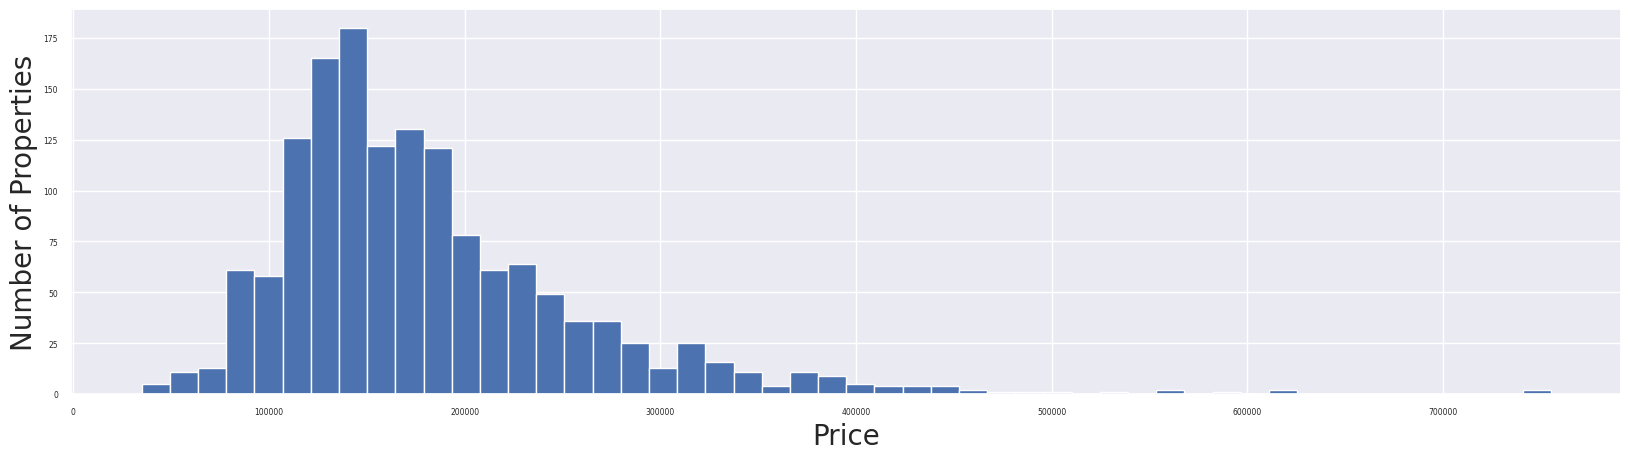

In [ ]:
plt.figure(figsize = (20, 5))
plt.hist(PriceColumn, 50)
plt.xlabel('Price', fontsize =20)
plt.ylabel('Number of Properties', fontsize =20)
plt.show()

## A method of identifying if there are relationships between catergorical data and numeric data is to use the H0 that can be derived from ANOVA analysis. In this case specifically the P-value.

## To get this we employ the **f_oneway**  algorithm in **Scipy.stats**

In [ ]:
# The f oneway() function takes the group data as input and returns F-statistic and P-value


# Running the one-way anova test between SalePrice and Neighborhood
# The  assumption (HO) is that Neighborhood and SalePrice are NOT correlated
# Finds out the Prices data for each Neighborhood as a list
CategoryGroupLists = HP_train_cat1.groupby('Neighborhood') ['SalePrice'].apply(list)
print(CategoryGroupLists)
# Apply the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
# F, p = f_oneway(CategoryGroupLists)
print ('P-Value for Anova is: ', AnovaResults[1])
# We accept the Assumption (HO) only when P-Value > 0.05

Neighborhood
Blmngtn    [167240, 192500, 192000, 172500, 178740, 23400...
Blueste                                     [151000, 124000]
BrDale     [112000, 106000, 94500, 89500, 118000, 85400, ...
BrkSide    [118000, 132000, 68500, 114500, 127000, 105000...
ClearCr    [225000, 180000, 235000, 190000, 211000, 27700...
CollgCr    [208500, 223500, 279500, 230000, 179900, 14500...
Crawfor    [140000, 163500, 217000, 259500, 200100, 31500...
Edwards    [82000, 94750, 83000, 136900, 155000, 130000, ...
Gilbert    [177000, 185000, 168500, 174000, 185000, 18000...
IDOTRR     [139400, 40000, 110000, 101000, 85000, 169500,...
MeadowV    [129900, 91000, 85000, 134000, 81000, 86000, 1...
Mitchel    [143000, 239686, 129500, 153500, 171000, 17300...
NAmes      [157000, 149000, 139000, 134800, 207500, 16550...
NPkVill    [128000, 148500, 147000, 140000, 148500, 15500...
NWAmes     [200000, 205000, 190000, 181000, 174000, 19000...
NoRidge    [250000, 260000, 290000, 403000, 290000, 26000...
NridgHt    

In [ ]:
for col in HP_train_cat1.columns:
  CategoryGroupLists = HP_train_cat1.groupby([col]) ['SalePrice'].apply(list)
  #print(CategoryGroupLists)
  AnovaResults = f_oneway(*CategoryGroupLists)
  # F, p = f_oneway(CategoryGroupLists)

  Counter(HP_train_cat1[col])

  #print (col, '  P-Value for Anova is: ', AnovaResults[1], '--- ', len(Counter(HP_train_cat1[col])), ' : ',  Counter(HP_train_cat1[col]) )
  print(f"{col: <{13}}", '  P-Value for Anova is: ', f"{AnovaResults[1]: <{24}}", '--', f"{len(Counter(HP_train_cat1[col])): <{3}}", ': ',  Counter(HP_train_cat1[col])  )
  #print(f"{'(col, 'P-Value for Anova is:', AnovaResults[1], '--- ', len(Counter(HP_train_cat1[col])), ' : ',  Counter(HP_train_cat1[col]))' : <20}")

####   If the output of the P-value is almost zero, hence, we reject H0. This means the variables are correlated with each other.

MSZoning        P-Value for Anova is:  8.817633866272648e-35    -- 5   :  Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
LotShape        P-Value for Anova is:  6.447523852011766e-25    -- 4   :  Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour     P-Value for Anova is:  2.7422167521379096e-08   -- 4   :  Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
LotConfig       P-Value for Anova is:  3.163167473604189e-06    -- 5   :  Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
Neighborhood    P-Value for Anova is:  1.5586002827707996e-225  -- 25  :  Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste':

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



In [ ]:
le = LabelEncoder()
stat, p = kruskal(le.fit_transform(HP_train_cat1['MSZoning']), HP_train_cat1['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Same distributions (fail to reject H0)')
else:
 print('Different distributions (reject H0)')

Statistics=2333.148, p=0.000
Different distributions (reject H0)


##Kruskal Wallis test

Here we use the Kruskal-Wallis H test (AKA the "one-way ANOVA on ranks") which is a rank-based non-parametric test used to determine if there are statistically significant differences between two or more groups of an independent variables on a continuous or ordinal dependent variable.

In [ ]:
for col in HP_train_cat1.columns:
  #stat, p =      kruskal(le.fit_transform(HP_train_cat1[col]), HP_train_cat1['SalePrice'])
  stat, p = stats.kruskal(le.fit_transform(HP_train_cat1[col]), HP_train_cat1['SalePrice'])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('Same distributions (fail to reject H0)')
  else:
    print('Different distributions (reject H0)')
  Counter(HP_train_cat1[col])


Statistics=2333.148, p=0.000
Different distributions (reject H0)
Statistics=2271.826, p=0.000
Different distributions (reject H0)
Statistics=2407.149, p=0.000
Different distributions (reject H0)
Statistics=2298.505, p=0.000
Different distributions (reject H0)
Statistics=2191.057, p=0.000
Different distributions (reject H0)
Statistics=2380.590, p=0.000
Different distributions (reject H0)
Statistics=2491.150, p=0.000
Different distributions (reject H0)
Statistics=2361.666, p=0.000
Different distributions (reject H0)
Statistics=2231.813, p=0.000
Different distributions (reject H0)
Statistics=2330.490, p=0.000
Different distributions (reject H0)
Statistics=2483.389, p=0.000
Different distributions (reject H0)
Statistics=2204.179, p=0.000
Different distributions (reject H0)
Statistics=2203.194, p=0.000
Different distributions (reject H0)
Statistics=2255.869, p=0.000
Different distributions (reject H0)
Statistics=2267.586, p=0.000
Different distributions (reject H0)
Statistics=2391.986, p=0.

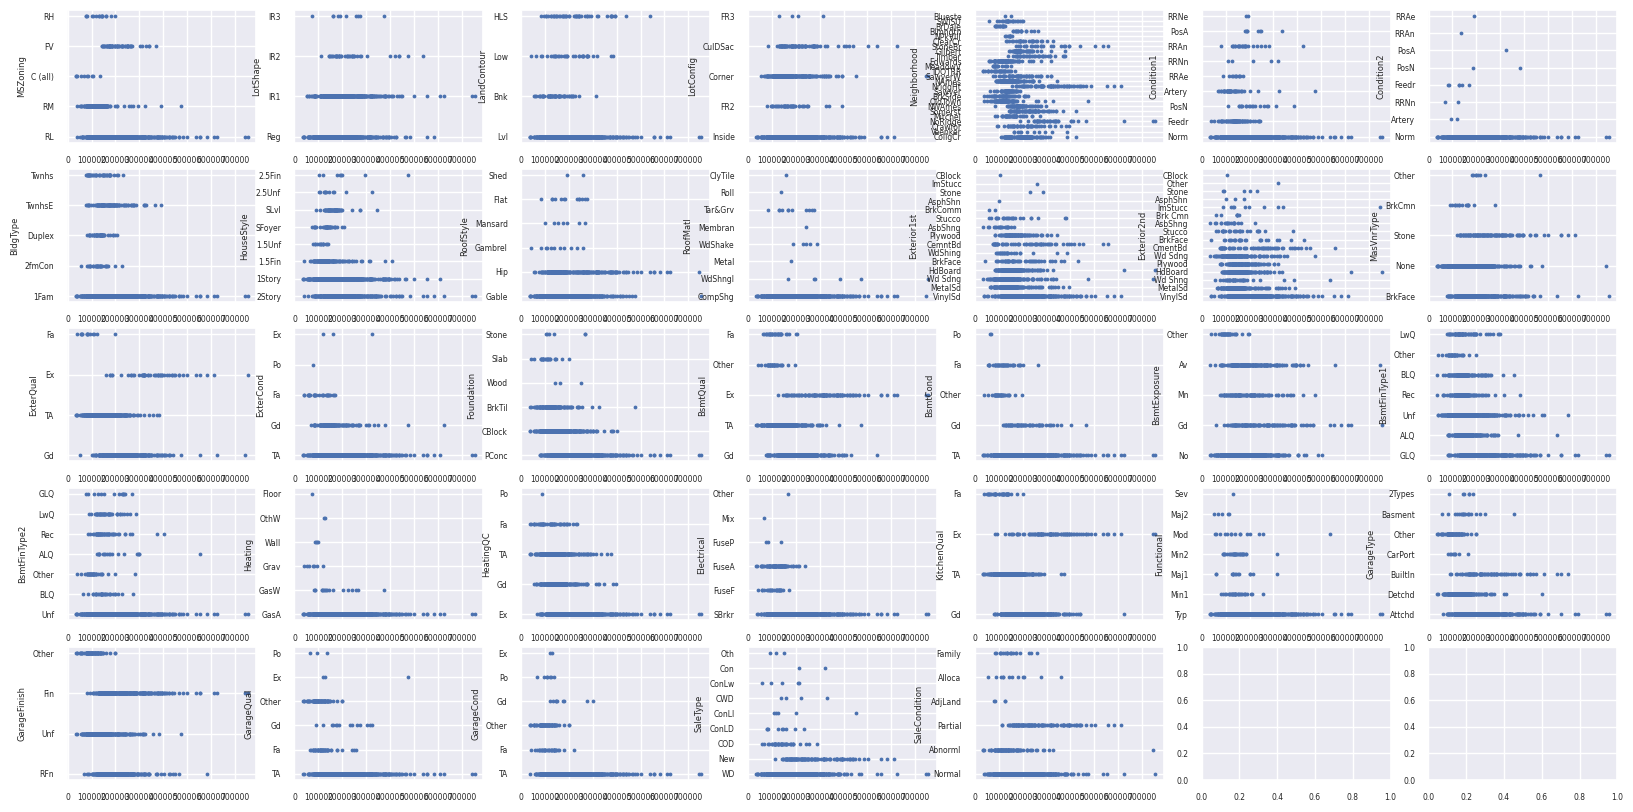

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(HP_train_cat1.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 10))

for col in HP_train_cat1.columns[0:-1]:
  #z = np.polyfit(HP_train_cat1['SalePrice'], HP_train_cat1[col], 1)
  #p = np.poly1d(z)
  axs[i][j].scatter(HP_train_cat1['SalePrice'], HP_train_cat1[col], s=3)
  axs[i][j].set_ylabel(col)
  #axs[i][j].plot(HP_train_cat1[col], p(HP_train_cat1[col]), color = 'red', label="col")
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()

In [ ]:

# This code was found in StackOverFlow
def visualizeCatFeature(feature):
    featOrder = HP_train_cat1.groupby( [feature] ).median().SalePrice.sort_values(ascending=True).index
    plt.figure(figsize=(12, 5))
    plt.xticks(rotation=45)
    sns.boxplot(x=feature, y=HP_train_cat1['SalePrice'], data=HP_train_cat1, order=featOrder, palette='Spectral' )


In [ ]:
 featOrder = HP_train_cat1.groupby( [HP_train_cat1['Neighborhood']]).median().SalePrice.sort_values(ascending=False).index
 featOrder

<ipython-input-115-b01a85868ff8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Index(['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Veenker',
       'Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert',
       'SawyerW', 'Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer',
       'BrkSide', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='Neighborhood')

In [ ]:
def visualizeCatFeatureViolin(feature):
    featOrder = HP_train_cat1[col].groupby([feature]).median().SalePrice.sort_values(ascending=True).index
    plt.figure(figsize=(18, 5))
    plt.xticks(rotation=45)
    sns.violinplot(x=feature, y=HP_train_cat1['SalePrice'], data=HP_train_cat1[col], order=featOrder, palette='Spectral' )

<ipython-input-114-dc59ade18a7d>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



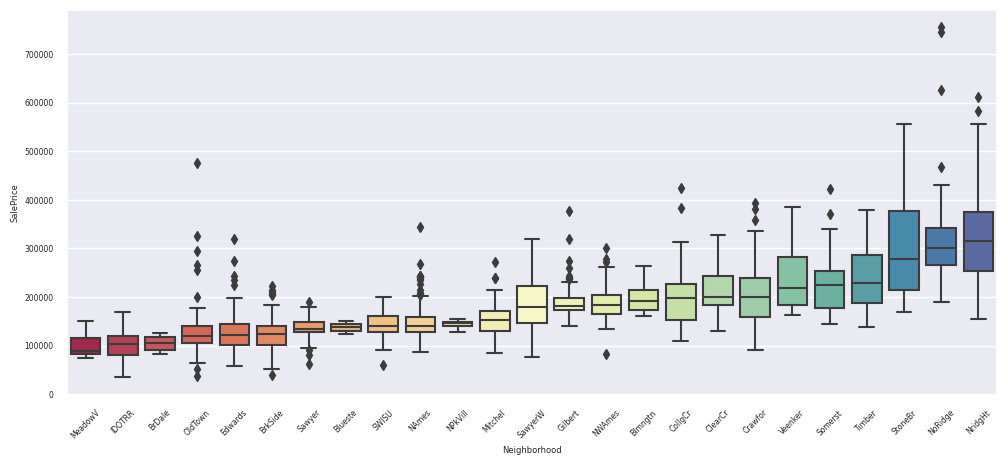

In [ ]:
visualizeCatFeature(HP_train_cat1['Neighborhood'])

## **Run T-Test between (ascending) pairs of features**

In [ ]:
HP_train_cat1.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [ ]:

# THIS Shows the box plots organised by price

# It runs but does not move onto the next cell

# for col in HP_train_cat1.columns:
#   plt.figure()
#   visualizeCatFeature(col)
#   title = plt.title('House Price by ' +str(col), fontsize=10)
#   tick = plt.xticks(rotation=45)
# plt.show()

The very low P-values calculated for the various catergorical columns suggest that all the catergoricals have a relationship (to some degree) with the'SalePrice' target

We can **use the MannWhitney hypothesis test to ascetain if any two features of a variable can be considered as statistically separate** / indentifiable. If they are not then the two fetaures can be combined. Otherwise leave them as separate

Combining features after OHE  will reduce the data size to be managed and will also reduce the likelihood  of overfitting

Lets do this as a test on one variable and one pair of features of that variable to start with

First OHE

Second  drop the original column

Third multiply all OHE columns with the target ( 'SalePrice')


In [ ]:
#  ************************************************************************************
##  AMALGAMATION
#  ************************************************************************************

HP_train_MSZoning_ohe = HP_train[['MSZoning']].copy()  #, 'SalePrice']].copy()

ohe = OneHotEncoder().fit(HP_train_cat1[['MSZoning']])
print("ohe.categories_[0]", ohe.categories_[0])
HP_train_MSZoning_ohe[ohe.categories_[0]] = ohe.transform(HP_train_cat1[['MSZoning']]).toarray()

HP_train_MSZoning_ohe.drop(['MSZoning'], axis=1,inplace=True)
HP_train_MSZoning_ohe

HP_train_MSZoning_oheSP = HP_train_MSZoning_ohe.copy()

for col in HP_train_MSZoning_oheSP:
  HP_train_MSZoning_oheSP[col] = HP_train_MSZoning_oheSP[col] * HP_train_cat1['SalePrice']

HP_train_MSZoning_oheSP.head()

ohe.categories_[0] ['C (all)' 'FV' 'RH' 'RL' 'RM']


,C (all),FV,RH,RL,RM
0,0.00,0.00,0.00,208500.00,0.00
1,0.00,0.00,0.00,181500.00,0.00
2,0.00,0.00,0.00,223500.00,0.00
3,0.00,0.00,0.00,140000.00,0.00
4,0.00,0.00,0.00,250000.00,0.00


In [ ]:
arr1 = HP_train_MSZoning_oheSP['RM'].to_numpy()
arr1 = np.delete(arr1, np.where(arr1 == [0]), axis=0)
print('arr1 =', arr1)

arr2 = HP_train_MSZoning_oheSP['RH'].to_numpy()
arr2 = np.delete(arr2, np.where(arr2 == [0]), axis=0)
print('\n', 'arr2 =',arr2)

stat, p = stats.mannwhitneyu(arr1, arr2, alternative='two-sided')
print('\n', 'stat =', stat, 'p =', p )

arr1 = [129900. 132000. 139400. 129900.  68500. 113000. 114500. 110000. 101000.
 140000.  80000. 107400.  91000. 127000. 110000. 153500. 169500. 100000.
 115000. 115000. 100000.  84500.  87000. 125000. 130000. 105000. 115000.
 125000. 152000. 128500. 100000. 200000. 475000. 130000. 104000. 140000.
 149000. 110000. 107000. 112000. 106000.  94500.  89500. 110500.  79000.
 137000. 235000.  97000. 130000.  73000. 120500. 152000. 295000.  89500.
 119900. 178000. 126175.  87000.  78000. 207000.  85000. 105900. 134000.
 118000. 147000.  67000. 115000. 206300. 135000.  85400.  79900. 122500.
  81000. 116000. 119000. 162900. 119500. 120000. 110000.  98000. 161000.
 178740. 148000.  89471. 155000. 164000.  86000. 115000.  91300. 113000.
 124500. 161000. 159000. 128000. 125000. 112500. 113000. 131500. 325000.
 133000.  79500. 140000. 114504. 151000. 141000.  75500. 124000.  60000.
  93000.  84500. 135000.  88000.  87000. 141000. 141500.  89000. 140000.
  55000. 159500. 143000. 103000. 163000. 132

In [ ]:
F, p = stats.f_oneway(HP_train_MSZoning_ohe['C (all)'], HP_train_MSZoning_ohe['FV'], HP_train_MSZoning_ohe['RH'], HP_train_MSZoning_ohe['RL'], HP_train_MSZoning_ohe['RM'])

print('F statistic:', F)
print('p-value:', p)

F statistic: 2297.131310835913
p-value: 0.0


Lets try and create a routine to loop through the categorical variables to:

1.   create a ohe dataset for each variable
2.   order the ohe features, which reduces the complexity of comparing features
3.   compare adjacent ohe features (A & B) via stats.mannwhitneyu and if
*      if   p < 0.05 leave features separate
*      elif p > 0.05 add the two features together (B = A+B), delete the latter feature and record deleted names in a dictionary for this variable. Then compare B to the next feature C etc

4.  Replace old ohe feature with new ohe for all variables

In [ ]:
## LOOP 1  CREATES THE OHE SET FOR EACH VARIABLE
OHE_Var_Dict = {}

OHE_ColTrans_Dict = {}

OHE_FinalReduced_DF = pd.DataFrame()
OHE_FinalRaw_DF = pd.DataFrame()

NoCol = 0  #this will count the total number of original OHE features for from all variable
for col in HP_train_cat1.columns[0:-1]:  #-1]:
  HP_train_cat1_col = HP_train_cat1[[col]].copy()
  transformer = ColumnTransformer( [('ohe', OneHotEncoder(), [col] )], remainder='passthrough' )
  transformed = transformer.fit_transform(HP_train_cat1_col) #[col])
  OHE_ColTrans_Dict[col] = transformer
  HP_train_cat1_ohe = pd.DataFrame(transformed.toarray(), columns=list(transformer.get_feature_names_out()))

  HP_train_cat1_col_oheSP_1 = HP_train_cat1_ohe.multiply(HP_train_cat1['SalePrice'], axis = 0)

  FeatOrder = pd.DataFrame({'name': list( HP_train_cat1_col_oheSP_1.columns ),
                        'Median_value': [np.median(HP_train_cat1_col_oheSP_1[HP_train_cat1_col_oheSP_1[col]>0][col].to_list()) for col in HP_train_cat1_col_oheSP_1.columns] })

  FeatOrderList = FeatOrder.sort_values(by ='Median_value').name.to_list()

  FeatOrderReduced = FeatOrderList.copy()

  HP_train_cat1_col_oheSP_1 = HP_train_cat1_col_oheSP_1[FeatOrderList]
  NoCol += len(FeatOrderList)

  #-------------------------------------------------------------------------

  OHE_Var_Dict[col] = {} # this will record how the feature columns from the OHE are combined
  for i in range (len(FeatOrderList)-1):   # -2]:
      arr1 = HP_train_cat1_col_oheSP_1[FeatOrderList[i]].to_numpy()
      arr1 = np.delete(arr1, np.where(arr1 == [0]), axis=0)
      #print('arr1 =', FeatOrderList[i], arr1)

      arr2 = HP_train_cat1_col_oheSP_1[FeatOrderList[i+1]].to_numpy()
      arr2 = np.delete(arr2, np.where(arr2 == [0]), axis=0)
      #print('\n', 'arr2 =', FeatOrderList[i+1], arr2)

      stat, p = stats.mannwhitneyu(arr1, arr2, alternative='two-sided')
      #print('\n', 'stat =', stat, 'p =', p )

      if p > 0.05:
        HP_train_cat1_col_oheSP_1[FeatOrderList[i+1]] = HP_train_cat1_col_oheSP_1[FeatOrderList[i]] + HP_train_cat1_col_oheSP_1[FeatOrderList[i+1]]
        HP_train_cat1_col_oheSP_1.drop([FeatOrderList[i]], axis=1,inplace=True)
        FeatOrderReduced.remove(FeatOrderList[i])

        OHE_Var_Dict[col][FeatOrderList[i]] = FeatOrderList[i+1]
        continue

      elif p < 0.05:
        OHE_Var_Dict[col][FeatOrderList[i]] = FeatOrderList[i]
        continue
  OHE_FinalRaw_DF     = pd.concat([OHE_FinalRaw_DF,     HP_train_cat1_ohe],         axis = 1)
  OHE_FinalReduced_DF = pd.concat([OHE_FinalReduced_DF, HP_train_cat1_col_oheSP_1], axis = 1)
  OHE_Var_Dict[col][FeatOrderList[-1]] = FeatOrderList[-1]
HP_train_cat1_col_oheSP_1.head()
#FeatOrderList


,ohe__SaleCondition_Alloca,ohe__SaleCondition_Normal,ohe__SaleCondition_Partial
0,0.00,208500.00,0.00
1,0.00,181500.00,0.00
2,0.00,223500.00,0.00
3,140000.00,0.00,0.00
4,0.00,250000.00,0.00


In [ ]:
OHE_FinalReduced_DF

,ohe__MSZoning_C (all),ohe__MSZoning_RH,ohe__MSZoning_RL,ohe__MSZoning_FV,ohe__LotShape_Reg,ohe__LotShape_IR3,ohe__LotShape_IR2,ohe__LandContour_Bnk,ohe__LandContour_Lvl,ohe__LandContour_HLS,ohe__LotConfig_FR3,ohe__LotConfig_CulDSac,ohe__Neighborhood_BrDale,ohe__Neighborhood_BrkSide,ohe__Neighborhood_NPkVill,ohe__Neighborhood_Mitchel,ohe__Neighborhood_CollgCr,ohe__Neighborhood_Timber,ohe__Neighborhood_NridgHt,ohe__Condition1_Artery,ohe__Condition1_RRAe,ohe__Condition1_RRNe,ohe__Condition1_RRNn,ohe__Condition2_RRAn,ohe__Condition2_PosA,ohe__BldgType_Twnhs,ohe__BldgType_TwnhsE,ohe__HouseStyle_1.5Unf,ohe__HouseStyle_SFoyer,ohe__HouseStyle_SLvl,ohe__HouseStyle_2.5Fin,ohe__RoofStyle_Mansard,ohe__RoofStyle_Shed,ohe__RoofMatl_Membran,ohe__RoofMatl_WdShngl,ohe__Exterior1st_AsbShng,ohe__Exterior1st_Stucco,ohe__Exterior1st_HdBoard,ohe__Exterior1st_Plywood,ohe__Exterior1st_ImStucc,ohe__Exterior2nd_AsbShng,ohe__Exterior2nd_Brk Cmn,ohe__Exterior2nd_ImStucc,ohe__Exterior2nd_Other,ohe__MasVnrType_None,ohe__MasVnrType_Other,ohe__MasVnrType_Stone,ohe__ExterQual_Fa,ohe__ExterQual_TA,ohe__ExterQual_Gd,ohe__ExterQual_Ex,ohe__ExterCond_Fa,ohe__ExterCond_Ex,ohe__ExterCond_TA,ohe__Foundation_Slab,ohe__Foundation_Stone,ohe__Foundation_Wood,ohe__Foundation_PConc,ohe__BsmtQual_Fa,ohe__BsmtQual_TA,ohe__BsmtQual_Gd,ohe__BsmtQual_Ex,ohe__BsmtCond_Po,ohe__BsmtCond_Fa,ohe__BsmtCond_TA,ohe__BsmtCond_Gd,ohe__BsmtExposure_Other,ohe__BsmtExposure_No,ohe__BsmtExposure_Av,ohe__BsmtExposure_Gd,ohe__BsmtFinType1_Other,ohe__BsmtFinType1_Rec,ohe__BsmtFinType1_Unf,ohe__BsmtFinType1_GLQ,ohe__BsmtFinType2_Other,ohe__BsmtFinType2_LwQ,ohe__BsmtFinType2_GLQ,ohe__Heating_Wall,ohe__Heating_GasA,ohe__HeatingQC_Fa,ohe__HeatingQC_TA,ohe__HeatingQC_Gd,ohe__HeatingQC_Ex,ohe__Electrical_FuseF,ohe__Electrical_Other,ohe__Electrical_SBrkr,ohe__KitchenQual_Fa,ohe__KitchenQual_TA,ohe__KitchenQual_Gd,ohe__KitchenQual_Ex,ohe__Functional_Maj1,ohe__Functional_Typ,ohe__GarageType_CarPort,ohe__GarageType_Detchd,ohe__GarageType_2Types,ohe__GarageType_Attchd,ohe__GarageType_BuiltIn,ohe__GarageFinish_Other,ohe__GarageFinish_Unf,ohe__GarageFinish_RFn,ohe__GarageFinish_Fin,ohe__GarageQual_Other,ohe__GarageQual_Ex,ohe__GarageQual_Gd,ohe__GarageCond_Ex,ohe__GarageCond_TA,ohe__SaleType_ConLw,ohe__SaleType_CWD,ohe__SaleType_Con,ohe__SaleCondition_Alloca,ohe__SaleCondition_Normal,ohe__SaleCondition_Partial
0,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,208500.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,208500.00,0.00,0.00,208500.00,0.00
1,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00
2,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,223500.00,0.00,0.00,0.00,0.00,0.00,223500.00,0.00,0.00,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,22350

In [ ]:
OHE_ColTrans_Dict

{'MSZoning': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['MSZoning'])]),
 'LotShape': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['LotShape'])]),
 'LandContour': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['LandContour'])]),
 'LotConfig': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['LotConfig'])]),
 'Neighborhood': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['Neighborhood'])]),
 'Condition1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['Condition1'])]),
 'Condition2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(), ['Condition2'])]),
 'BldgType': ColumnTransformer(remainder='passthrough',
   

In [ ]:
OHE_Var_Dict

{'MSZoning': {'ohe__MSZoning_C (all)': 'ohe__MSZoning_C (all)',
  'ohe__MSZoning_RM': 'ohe__MSZoning_RH',
  'ohe__MSZoning_RH': 'ohe__MSZoning_RH',
  'ohe__MSZoning_RL': 'ohe__MSZoning_RL',
  'ohe__MSZoning_FV': 'ohe__MSZoning_FV'},
 'LotShape': {'ohe__LotShape_Reg': 'ohe__LotShape_Reg',
  'ohe__LotShape_IR1': 'ohe__LotShape_IR3',
  'ohe__LotShape_IR3': 'ohe__LotShape_IR3',
  'ohe__LotShape_IR2': 'ohe__LotShape_IR2'},
 'LandContour': {'ohe__LandContour_Bnk': 'ohe__LandContour_Bnk',
  'ohe__LandContour_Lvl': 'ohe__LandContour_Lvl',
  'ohe__LandContour_Low': 'ohe__LandContour_HLS',
  'ohe__LandContour_HLS': 'ohe__LandContour_HLS'},
 'LotConfig': {'ohe__LotConfig_Inside': 'ohe__LotConfig_Corner',
  'ohe__LotConfig_Corner': 'ohe__LotConfig_FR2',
  'ohe__LotConfig_FR2': 'ohe__LotConfig_FR3',
  'ohe__LotConfig_FR3': 'ohe__LotConfig_FR3',
  'ohe__LotConfig_CulDSac': 'ohe__LotConfig_CulDSac'},
 'Neighborhood': {'ohe__Neighborhood_MeadowV': 'ohe__Neighborhood_IDOTRR',
  'ohe__Neighborhood_IDOTR

In [ ]:
NoCol

233

In [ ]:
OHE_FinalReduced_DF.shape

(1460, 112)

We can see that the 'Final' number of combined OHE Feature columns is approx half of the the original number of feature columns

In [ ]:
OHE_FinalReduced_DF

,ohe__MSZoning_C (all),ohe__MSZoning_RH,ohe__MSZoning_RL,ohe__MSZoning_FV,ohe__LotShape_Reg,ohe__LotShape_IR3,ohe__LotShape_IR2,ohe__LandContour_Bnk,ohe__LandContour_Lvl,ohe__LandContour_HLS,ohe__LotConfig_FR3,ohe__LotConfig_CulDSac,ohe__Neighborhood_BrDale,ohe__Neighborhood_BrkSide,ohe__Neighborhood_NPkVill,ohe__Neighborhood_Mitchel,ohe__Neighborhood_CollgCr,ohe__Neighborhood_Timber,ohe__Neighborhood_NridgHt,ohe__Condition1_Artery,ohe__Condition1_RRAe,ohe__Condition1_RRNe,ohe__Condition1_RRNn,ohe__Condition2_RRAn,ohe__Condition2_PosA,ohe__BldgType_Twnhs,ohe__BldgType_TwnhsE,ohe__HouseStyle_1.5Unf,ohe__HouseStyle_SFoyer,ohe__HouseStyle_SLvl,ohe__HouseStyle_2.5Fin,ohe__RoofStyle_Mansard,ohe__RoofStyle_Shed,ohe__RoofMatl_Membran,ohe__RoofMatl_WdShngl,ohe__Exterior1st_AsbShng,ohe__Exterior1st_Stucco,ohe__Exterior1st_HdBoard,ohe__Exterior1st_Plywood,ohe__Exterior1st_ImStucc,ohe__Exterior2nd_AsbShng,ohe__Exterior2nd_Brk Cmn,ohe__Exterior2nd_ImStucc,ohe__Exterior2nd_Other,ohe__MasVnrType_None,ohe__MasVnrType_Other,ohe__MasVnrType_Stone,ohe__ExterQual_Fa,ohe__ExterQual_TA,ohe__ExterQual_Gd,ohe__ExterQual_Ex,ohe__ExterCond_Fa,ohe__ExterCond_Ex,ohe__ExterCond_TA,ohe__Foundation_Slab,ohe__Foundation_Stone,ohe__Foundation_Wood,ohe__Foundation_PConc,ohe__BsmtQual_Fa,ohe__BsmtQual_TA,ohe__BsmtQual_Gd,ohe__BsmtQual_Ex,ohe__BsmtCond_Po,ohe__BsmtCond_Fa,ohe__BsmtCond_TA,ohe__BsmtCond_Gd,ohe__BsmtExposure_Other,ohe__BsmtExposure_No,ohe__BsmtExposure_Av,ohe__BsmtExposure_Gd,ohe__BsmtFinType1_Other,ohe__BsmtFinType1_Rec,ohe__BsmtFinType1_Unf,ohe__BsmtFinType1_GLQ,ohe__BsmtFinType2_Other,ohe__BsmtFinType2_LwQ,ohe__BsmtFinType2_GLQ,ohe__Heating_Wall,ohe__Heating_GasA,ohe__HeatingQC_Fa,ohe__HeatingQC_TA,ohe__HeatingQC_Gd,ohe__HeatingQC_Ex,ohe__Electrical_FuseF,ohe__Electrical_Other,ohe__Electrical_SBrkr,ohe__KitchenQual_Fa,ohe__KitchenQual_TA,ohe__KitchenQual_Gd,ohe__KitchenQual_Ex,ohe__Functional_Maj1,ohe__Functional_Typ,ohe__GarageType_CarPort,ohe__GarageType_Detchd,ohe__GarageType_2Types,ohe__GarageType_Attchd,ohe__GarageType_BuiltIn,ohe__GarageFinish_Other,ohe__GarageFinish_Unf,ohe__GarageFinish_RFn,ohe__GarageFinish_Fin,ohe__GarageQual_Other,ohe__GarageQual_Ex,ohe__GarageQual_Gd,ohe__GarageCond_Ex,ohe__GarageCond_TA,ohe__SaleType_ConLw,ohe__SaleType_CWD,ohe__SaleType_Con,ohe__SaleCondition_Alloca,ohe__SaleCondition_Normal,ohe__SaleCondition_Partial
0,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,208500.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,0.00,0.00,208500.00,0.00,208500.00,0.00,208500.00,0.00,0.00,208500.00,0.00
1,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,181500.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,0.00,0.00,181500.00,0.00,181500.00,0.00,181500.00,0.00,0.00,181500.00,0.00
2,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,223500.00,0.00,0.00,0.00,0.00,0.00,223500.00,0.00,0.00,0.00,0.00,223500.00,0.00,0.00,223500.00,0.00,22350

NEED TO REPLACE THE SALE PRICES ABOVE IN  **"OHE_FinalReduced_DF"**  WITH THE VALUE = 1

In [ ]:
OHE_FinalReduced_DF[OHE_FinalReduced_DF != 0] = 1
OHE_FinalReduced_DF

,ohe__MSZoning_C (all),ohe__MSZoning_RH,ohe__MSZoning_RL,ohe__MSZoning_FV,ohe__LotShape_Reg,ohe__LotShape_IR3,ohe__LotShape_IR2,ohe__LandContour_Bnk,ohe__LandContour_Lvl,ohe__LandContour_HLS,ohe__LotConfig_FR3,ohe__LotConfig_CulDSac,ohe__Neighborhood_BrDale,ohe__Neighborhood_BrkSide,ohe__Neighborhood_NPkVill,ohe__Neighborhood_Mitchel,ohe__Neighborhood_CollgCr,ohe__Neighborhood_Timber,ohe__Neighborhood_NridgHt,ohe__Condition1_Artery,ohe__Condition1_RRAe,ohe__Condition1_RRNe,ohe__Condition1_RRNn,ohe__Condition2_RRAn,ohe__Condition2_PosA,ohe__BldgType_Twnhs,ohe__BldgType_TwnhsE,ohe__HouseStyle_1.5Unf,ohe__HouseStyle_SFoyer,ohe__HouseStyle_SLvl,ohe__HouseStyle_2.5Fin,ohe__RoofStyle_Mansard,ohe__RoofStyle_Shed,ohe__RoofMatl_Membran,ohe__RoofMatl_WdShngl,ohe__Exterior1st_AsbShng,ohe__Exterior1st_Stucco,ohe__Exterior1st_HdBoard,ohe__Exterior1st_Plywood,ohe__Exterior1st_ImStucc,ohe__Exterior2nd_AsbShng,ohe__Exterior2nd_Brk Cmn,ohe__Exterior2nd_ImStucc,ohe__Exterior2nd_Other,ohe__MasVnrType_None,ohe__MasVnrType_Other,ohe__MasVnrType_Stone,ohe__ExterQual_Fa,ohe__ExterQual_TA,ohe__ExterQual_Gd,ohe__ExterQual_Ex,ohe__ExterCond_Fa,ohe__ExterCond_Ex,ohe__ExterCond_TA,ohe__Foundation_Slab,ohe__Foundation_Stone,ohe__Foundation_Wood,ohe__Foundation_PConc,ohe__BsmtQual_Fa,ohe__BsmtQual_TA,ohe__BsmtQual_Gd,ohe__BsmtQual_Ex,ohe__BsmtCond_Po,ohe__BsmtCond_Fa,ohe__BsmtCond_TA,ohe__BsmtCond_Gd,ohe__BsmtExposure_Other,ohe__BsmtExposure_No,ohe__BsmtExposure_Av,ohe__BsmtExposure_Gd,ohe__BsmtFinType1_Other,ohe__BsmtFinType1_Rec,ohe__BsmtFinType1_Unf,ohe__BsmtFinType1_GLQ,ohe__BsmtFinType2_Other,ohe__BsmtFinType2_LwQ,ohe__BsmtFinType2_GLQ,ohe__Heating_Wall,ohe__Heating_GasA,ohe__HeatingQC_Fa,ohe__HeatingQC_TA,ohe__HeatingQC_Gd,ohe__HeatingQC_Ex,ohe__Electrical_FuseF,ohe__Electrical_Other,ohe__Electrical_SBrkr,ohe__KitchenQual_Fa,ohe__KitchenQual_TA,ohe__KitchenQual_Gd,ohe__KitchenQual_Ex,ohe__Functional_Maj1,ohe__Functional_Typ,ohe__GarageType_CarPort,ohe__GarageType_Detchd,ohe__GarageType_2Types,ohe__GarageType_Attchd,ohe__GarageType_BuiltIn,ohe__GarageFinish_Other,ohe__GarageFinish_Unf,ohe__GarageFinish_RFn,ohe__GarageFinish_Fin,ohe__GarageQual_Other,ohe__GarageQual_Ex,ohe__GarageQual_Gd,ohe__GarageCond_Ex,ohe__GarageCond_TA,ohe__SaleType_ConLw,ohe__SaleType_CWD,ohe__SaleType_Con,ohe__SaleCondition_Alloca,ohe__SaleCondition_Normal,ohe__SaleCondition_Partial
0,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
2,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,

## So now we have two DFs
1.   An 'raw' unfiltered categorical DF (**OHE_FinalRaw_DF**)
2.   A filtered DF (**OHE_FinalReduced_DF**) with the reduced OHE Catergorical Data  

Both can be used either by itself (+ '**SalePrice**') or recombned with the numeric data to use in ML


## Returning to look at the numerical data columns (**HP_train_num1**) and their relationships with the '**SalePrice**'

In [ ]:
HP_train_num1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

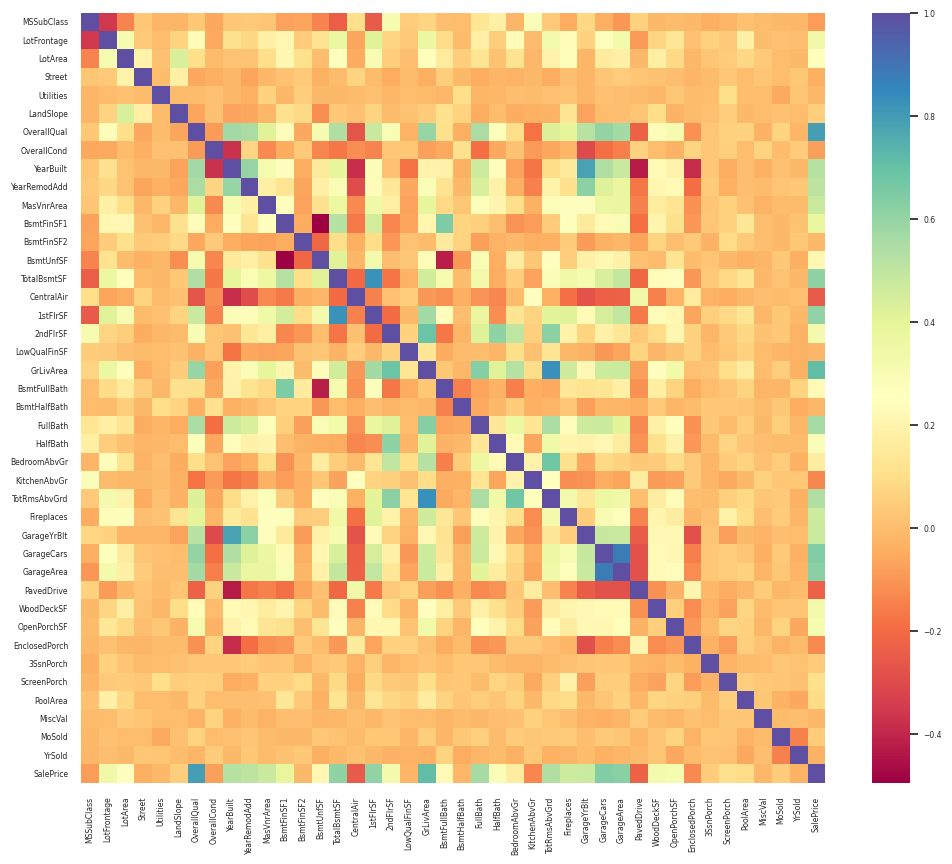

In [ ]:
corr = HP_train_num1.corr()
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corr, cmap='Spectral')   # 'inferno'
sns.set(font_scale=.5)
plt.show()

## Visually we can see that 'Saleprice' vs the variables is quite diverse. So lets look at the correlation values - specifically the **Pearson** (parametric)correlation

Spearman - non parametric

In [ ]:
pearsoncorr = HP_train_num1.corr(method='pearson')
pearsoncorr.shape
pearsoncorr_SalePrice = pd.DataFrame(pearsoncorr['SalePrice'].copy())
pearsoncorr_SalePrice_T =   pearsoncorr_SalePrice.T
pearsoncorr_SalePrice_T
pearsoncorr_SalePrice_T.sort_values(by='SalePrice', ascending=False, na_position='last')
# pearsoncorr_SalePrice_T.shape
# pearsoncorr_SalePrice_T['SalePrice']

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.08,0.33,0.26,-0.04,-0.01,0.05,0.79,-0.08,0.52,0.51,0.48,0.39,-0.01,0.21,0.61,-0.25,0.61,0.32,-0.03,0.71,0.23,-0.02,0.56,0.28,0.17,-0.14,0.53,0.47,0.47,0.64,0.62,-0.23,0.32,0.32,-0.13,0.04,0.11,0.09,-0.02,0.05,-0.03,1.00


In [ ]:
#pearsoncorr_SalePrice

In [ ]:
pearsoncorr_SalePrice_T.shape

(1, 42)

In [ ]:
spearmancorr = HP_train_num1.corr(method='spearman')
spearmancorr.shape
spearmancorr_SalePrice = pd.DataFrame(spearmancorr['SalePrice'].copy())
spearmancorr_SalePrice_T =   spearmancorr_SalePrice.T
spearmancorr_SalePrice_T
spearmancorr_SalePrice_T.sort_values(by='SalePrice', ascending=False, na_position='last')
# pearsoncorr_SalePrice_T.shape
# pearsoncorr_SalePrice_T['SalePrice']

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,0.01,0.39,0.46,-0.05,-0.02,0.05,0.81,-0.13,0.65,0.57,0.42,0.30,-0.04,0.19,0.60,-0.31,0.58,0.29,-0.07,0.73,0.23,-0.01,0.64,0.34,0.23,-0.16,0.53,0.52,0.57,0.69,0.65,-0.28,0.35,0.48,-0.22,0.07,0.10,0.06,-0.06,0.07,-0.03,1.00


Degree of correlation:

Perfect: If the value is 1, then it said to be a perfect correlation

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Correlation coefficients whose magnitude are less than 0.3 have little if any (linear) correlation

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

## **Lets look at the data as scatter plots at this stage**

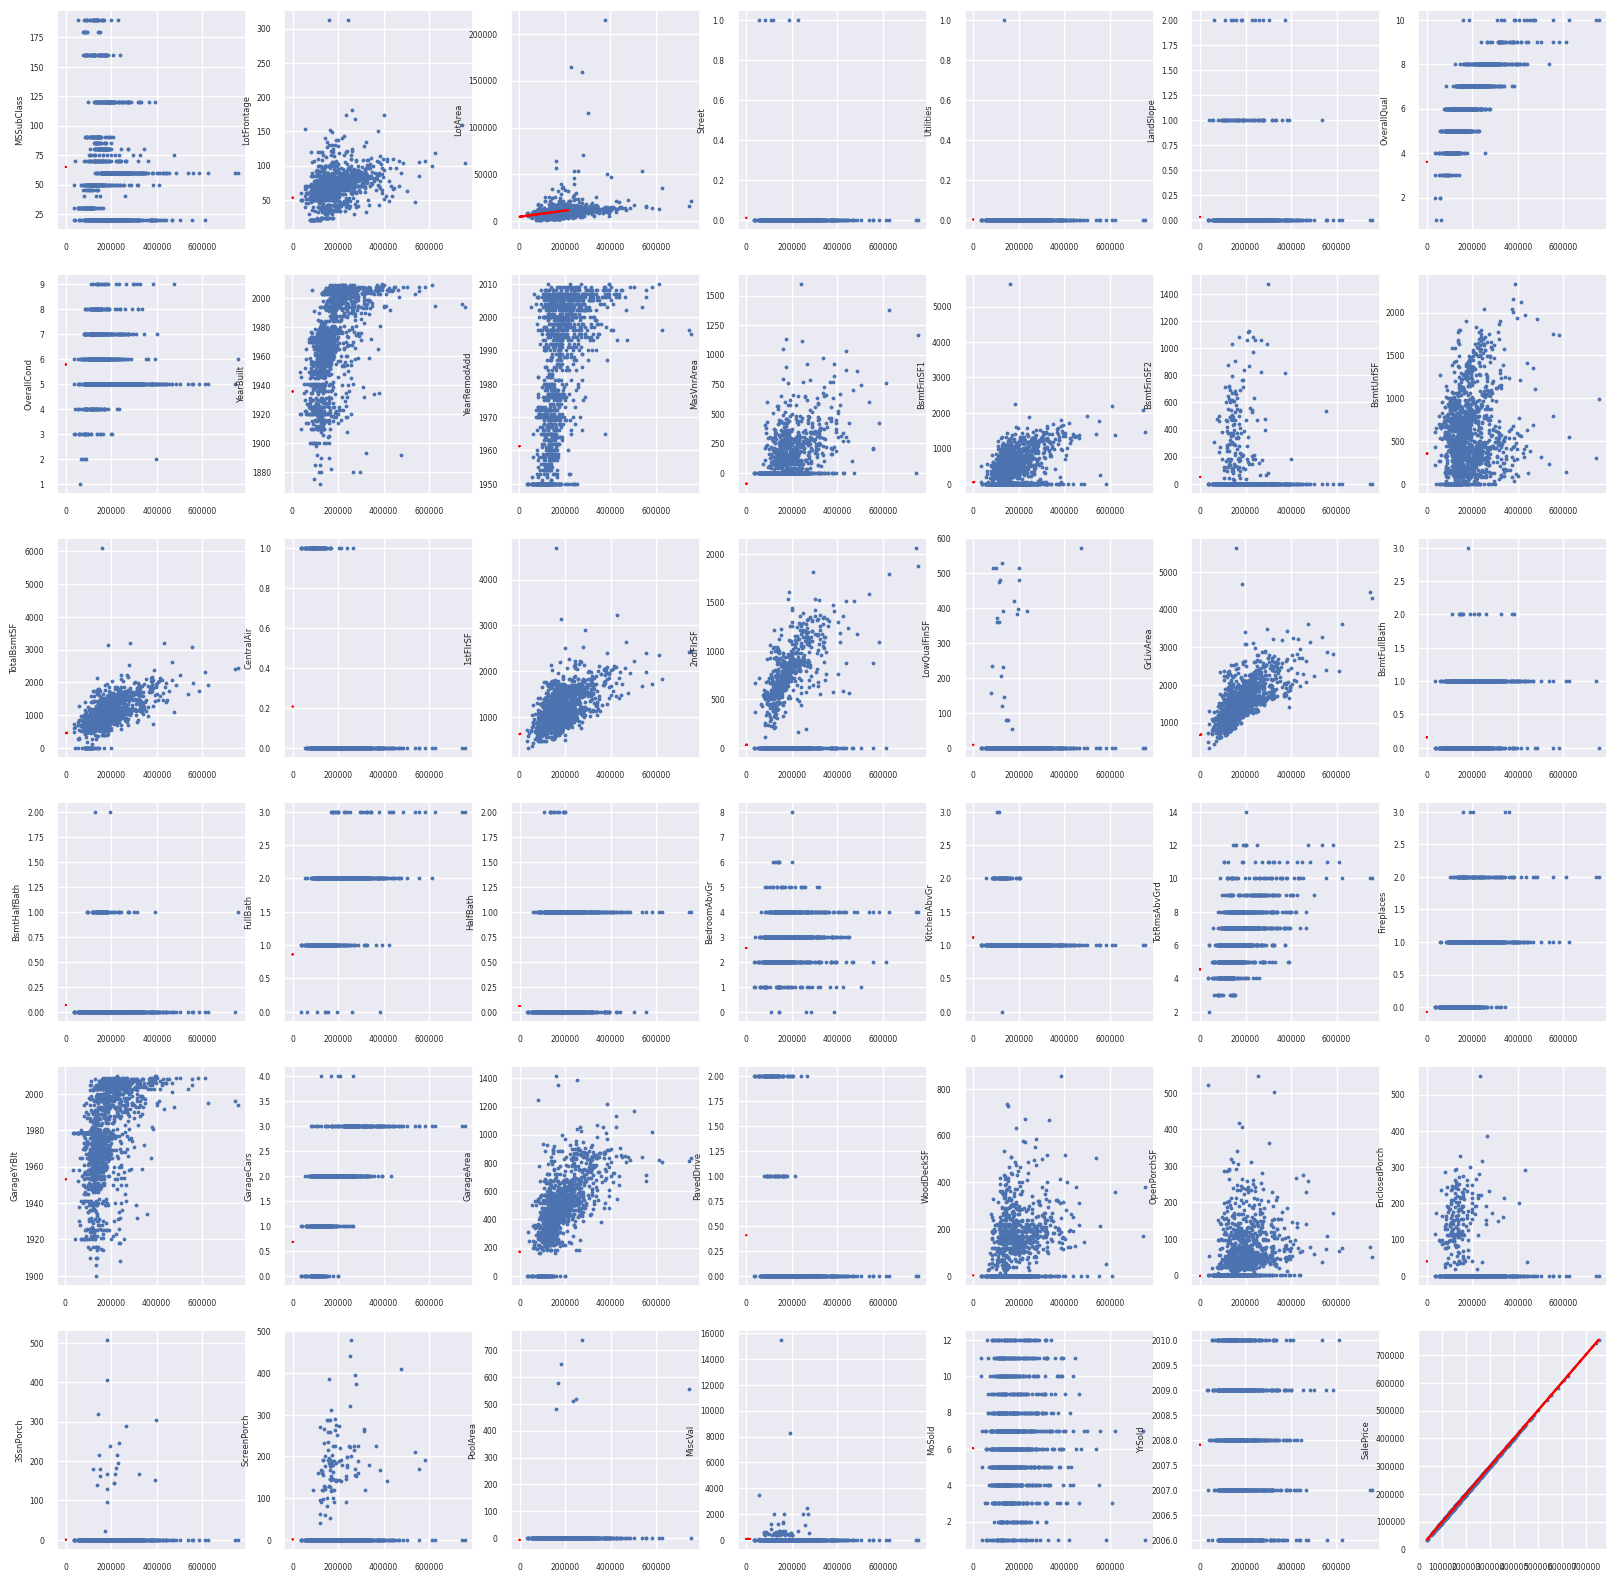

In [ ]:

i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(HP_train_num1.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))

for col in HP_train_num1.columns:
  z = np.polyfit(HP_train_num1['SalePrice'], HP_train_num1[col], 1)
  p = np.poly1d(z)
  axs[i][j].scatter(HP_train_num1['SalePrice'], HP_train_num1[col], s=3)
  axs[i][j].set_ylabel(col)
  axs[i][j].plot(HP_train_num1[col], p(HP_train_num1[col]), color = 'red', label="col")
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()


### So  lets copy '**HP_train_num1**' to '**HP_train_num1_gdcorr**' & remove columns from '**HP_train_num1_gdcorr**' where abs(correlation) is <0.10.

### This should leave us with a dataframe (of the numerics) which have reasonable correlations and possibly a couple of poor correlations but the worst correlations should have been removed

In [ ]:
HP_train_num1_gdcorr = HP_train_num1.copy()

for col in pearsoncorr_SalePrice_T.columns:
  if abs(pearsoncorr_SalePrice_T[col].iloc[0]) <0.1:  # using <0.1 rather than 0.3 and will use regr.feature_importances_   to filter  later
    HP_train_num1_gdcorr.drop([col], axis=1,inplace=True)

print(HP_train_num1_gdcorr.shape)
HP_train_num1_gdcorr


(1460, 29)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.00,8450,7,2003,2003,196.00,706,150,856,0,856,854,1710,1,2,1,3,1,8,0,2003.00,2,548,0,0,61,0,0,208500
1,80.00,9600,6,1976,1976,0.00,978,284,1262,0,1262,0,1262,0,2,0,3,1,6,1,1976.00,2,460,0,298,0,0,0,181500
2,68.00,11250,7,2001,2002,162.00,486,434,920,0,920,866,1786,1,2,1,3,1,6,1,2001.00,2,608,0,0,42,0,0,223500
3,60.00,9550,7,1915,1970,0.00,216,540,756,0,961,756,1717,1,1,0,3,1,7,1,1998.00,3,642,0,0,35,272,0,140000
4,84.00,14260,8,2000,2000,350.00,655,490,1145,0,1145,1053,2198,1,2,1,4,1,9,1,2000.00,3,836,0,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.00,7917,6,1999,2000,0.00,0,953,953,0,953,694,1647,0,2,1,3,1,7,1,1999.00,2,460,0,0,40,0,0,175000
1456,85.00,13175,6,1978,1988,119.00,790,589,1542,0,2073,0,2073,1,2,0,3,1,7,2,1978.00,2,500,0,349,0,0,0,210000
1457,66.00,9042,7,1941,2006,0.00,275,877,1152,0,1188,1152,2340,0,2,0,4,1,9,2,1941.00,1,252,0,0,60,0,0,266500
1458,68.00,9717,5,1950,1996,0.00,49,0,1078,0,1078,0,1078,1,1,0,2,1,5,0,1950.00,1,240,0,366,0,112,0,142125


In [ ]:
HP_train_num1_gdcorr.shape

(1460, 29)

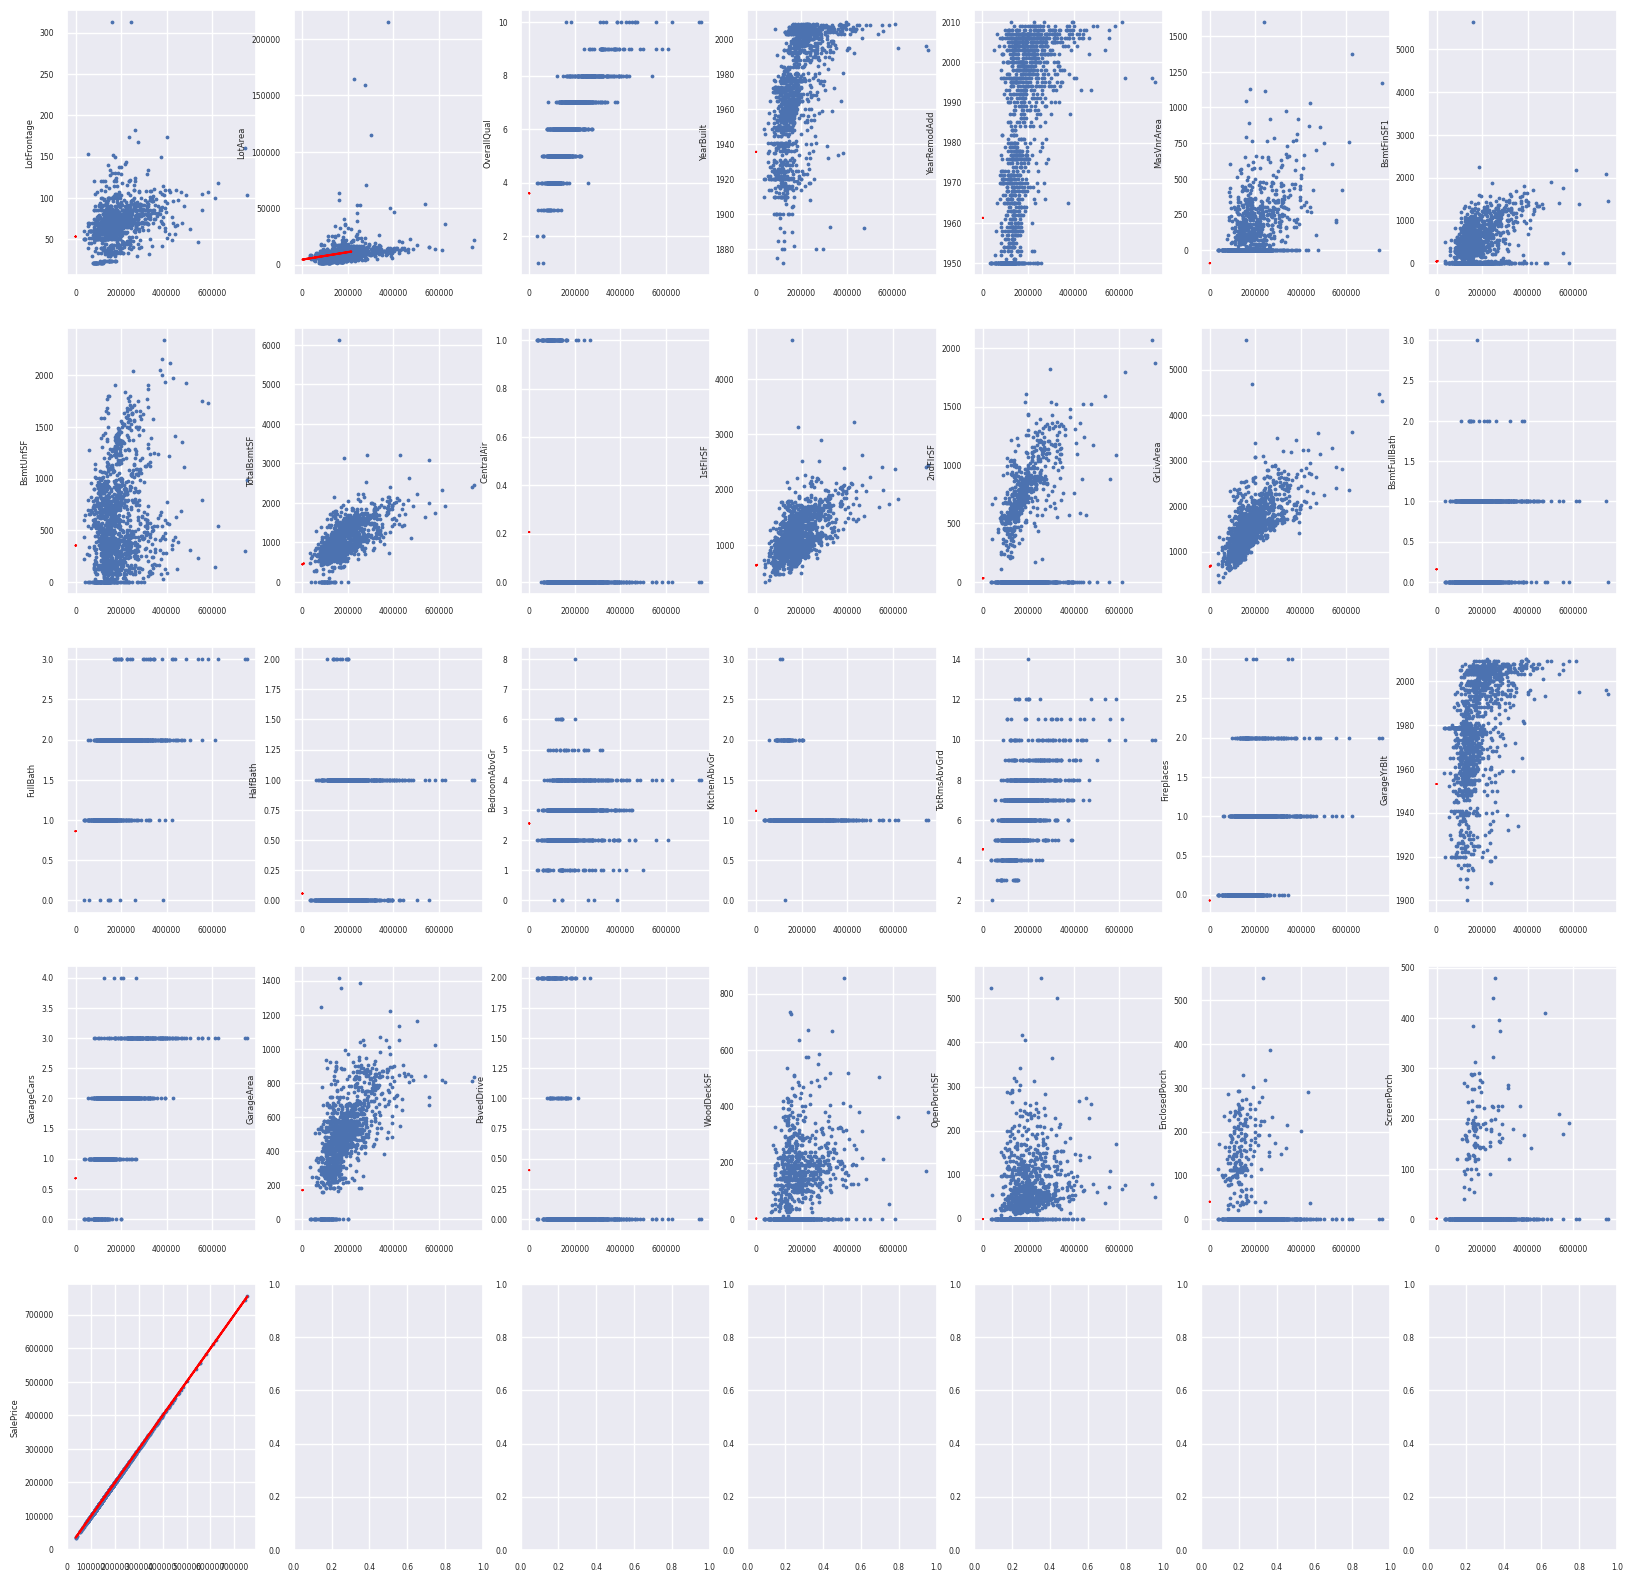

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(HP_train_num1_gdcorr.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))

for col in HP_train_num1_gdcorr.columns:
  z = np.polyfit(HP_train_num1_gdcorr['SalePrice'], HP_train_num1_gdcorr[col], 1)
  p = np.poly1d(z)
  axs[i][j].scatter(HP_train_num1_gdcorr['SalePrice'], HP_train_num1_gdcorr[col], s=3)
  axs[i][j].set_ylabel(col)
  axs[i][j].plot(HP_train_num1_gdcorr[col], p(HP_train_num1_gdcorr[col]), color = 'red', label="col")
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()

## **Based on this NUMERIC SUBSET of the original data lets test some ML routines to ascertain whether we are starting to get results that are useful**

# **NEED TO CONSIDER SCALING DATA - BUT ALLOW FOR NEW DATA THAT COULD BE OUT OF CURRENT RANGES**

## Split 'HP_train_num1_gdcorr' Dataset into test and training sets BUT first lets separate into X and y`




In [ ]:
HP_train_num1_gdcorr_X  = HP_train_num1_gdcorr.copy()
HP_train_num1_gdcorr_y  = HP_train_num1_gdcorr['SalePrice'].copy()

HP_train_num1_gdcorr_X.drop(['SalePrice'], axis=1,inplace=True)

print(HP_train_num1_gdcorr_X.shape)
print(HP_train_num1_gdcorr_y.shape)

(1460, 28)
(1460,)


In [ ]:
HP_train_num1_gdcorr_X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.00,8450,7,2003,2003,196.00,706,150,856,0,856,854,1710,1,2,1,3,1,8,0,2003.00,2,548,0,0,61,0,0
1,80.00,9600,6,1976,1976,0.00,978,284,1262,0,1262,0,1262,0,2,0,3,1,6,1,1976.00,2,460,0,298,0,0,0
2,68.00,11250,7,2001,2002,162.00,486,434,920,0,920,866,1786,1,2,1,3,1,6,1,2001.00,2,608,0,0,42,0,0
3,60.00,9550,7,1915,1970,0.00,216,540,756,0,961,756,1717,1,1,0,3,1,7,1,1998.00,3,642,0,0,35,272,0
4,84.00,14260,8,2000,2000,350.00,655,490,1145,0,1145,1053,2198,1,2,1,4,1,9,1,2000.00,3,836,0,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.00,7917,6,1999,2000,0.00,0,953,953,0,953,694,1647,0,2,1,3,1,7,1,1999.00,2,460,0,0,40,0,0
1456,85.00,13175,6,1978,1988,119.00,790,589,1542,0,2073,0,2073,1,2,0,3,1,7,2,1978.00,2,500,0,349,0,0,0
1457,66.00,9042,7,1941,2006,0.00,275,877,1152,0,1188,1152,2340,0,2,0,4,1,9,2,1941.00,1,252,0,0,60,0,0
1458,68.00,9717,5,1950,1996,0.00,49,0,1078,0,1078,0,1078,1,1,0,2,1,5,0,1950.00,1,240,0,366,0,112,0


In [ ]:
HP_train_num1_gdcorr_y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(HP_train_num1_gdcorr_X, HP_train_num1_gdcorr_y, test_size=0.25, random_state=0)

In [ ]:
y_train.min()

34900

In [ ]:
logisticRegr = LogisticRegression(max_iter = 1000)

logisticRegr.fit(x_train, y_train)
# Returns a NumPy Array

y_pred = logisticRegr.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

print("r2_score:", r2)


MSE: 2446805124.7972603
r2_score: 0.6293795874591683


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
print("r2_score:", r2)


MSE: 1986511885.2309992
r2_score: 0.6991007387715102


## **Lets see which numeric variables have Importance and also those which have No Importance and can be removed from the ML**


In [ ]:
regr.feature_importances_.sum()

0.9999999999999999

In [ ]:
feature_importances = regr.feature_importances_
feature_importances

array([0.00000000e+00, 1.81800849e-03, 8.37436851e-01, 0.00000000e+00,
       0.00000000e+00, 6.00622685e-03, 4.77343668e-03, 0.00000000e+00,
       1.63808108e-02, 0.00000000e+00, 9.12207410e-03, 5.84517827e-03,
       7.86184543e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.00099188e-03, 0.00000000e+00,
       0.00000000e+00, 3.09491993e-02, 6.25551869e-03, 0.00000000e+00,
       7.93249933e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
feature_names = regr.feature_names_in_
feature_names

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'], dtype=object)

In [ ]:
feature_importance = np.column_stack((feature_names,feature_importances))
feature_importance

array([['LotFrontage', 0.0],
       ['LotArea', 0.0018180084850397086],
       ['OverallQual', 0.837436850704301],
       ['YearBuilt', 0.0],
       ['YearRemodAdd', 0.0],
       ['MasVnrArea', 0.006006226851616892],
       ['BsmtFinSF1', 0.004773436677537294],
       ['BsmtUnfSF', 0.0],
       ['TotalBsmtSF', 0.01638081081526483],
       ['CentralAir', 0.0],
       ['1stFlrSF', 0.009122074097677768],
       ['2ndFlrSF', 0.005845178268087757],
       ['GrLivArea', 0.07861845426414509],
       ['BsmtFullBath', 0.0],
       ['FullBath', 0.0],
       ['HalfBath', 0.0],
       ['BedroomAbvGr', 0.0],
       ['KitchenAbvGr', 0.0],
       ['TotRmsAbvGrd', 0.0020009918785631677],
       ['Fireplaces', 0.0],
       ['GarageYrBlt', 0.0],
       ['GarageCars', 0.030949199336809546],
       ['GarageArea', 0.006255518687987219],
       ['PavedDrive', 0.0],
       ['WoodDeckSF', 0.0007932499329697175],
       ['OpenPorchSF', 0.0],
       ['EnclosedPorch', 0.0],
       ['ScreenPorch', 0.0]], dtype=ob

## Where a '**feature_importances**' variable == 0.0 remove this variable from  '**HP_train_num1_gdcorr**' since these will not add any value to the ML process

In [ ]:
HP_train_num1_gdcorrEd   = HP_train_num1_gdcorr.copy()

for col in HP_train_num1_gdcorrEd.columns:
  for i in feature_importance:
    if col == i[0] and i[1]==0.0:
      HP_train_num1_gdcorrEd.drop([i[0]], axis=1,inplace=True)


HP_train_num1_gdcorrEd

,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,SalePrice
0,8450,7,196.00,706,856,856,854,1710,8,2,548,0,208500
1,9600,6,0.00,978,1262,1262,0,1262,6,2,460,298,181500
2,11250,7,162.00,486,920,920,866,1786,6,2,608,0,223500
3,9550,7,0.00,216,756,961,756,1717,7,3,642,0,140000
4,14260,8,350.00,655,1145,1145,1053,2198,9,3,836,192,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0.00,0,953,953,694,1647,7,2,460,0,175000
1456,13175,6,119.00,790,1542,2073,0,2073,7,2,500,349,210000
1457,9042,7,0.00,275,1152,1188,1152,2340,9,1,252,0,266500
1458,9717,5,0.00,49,1078,1078,0,1078,5,1,240,366,142125


In [ ]:
Final_num_cols = HP_train_num1_gdcorrEd.columns
Final_num_cols

Index(['LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'SalePrice'],
      dtype='object')

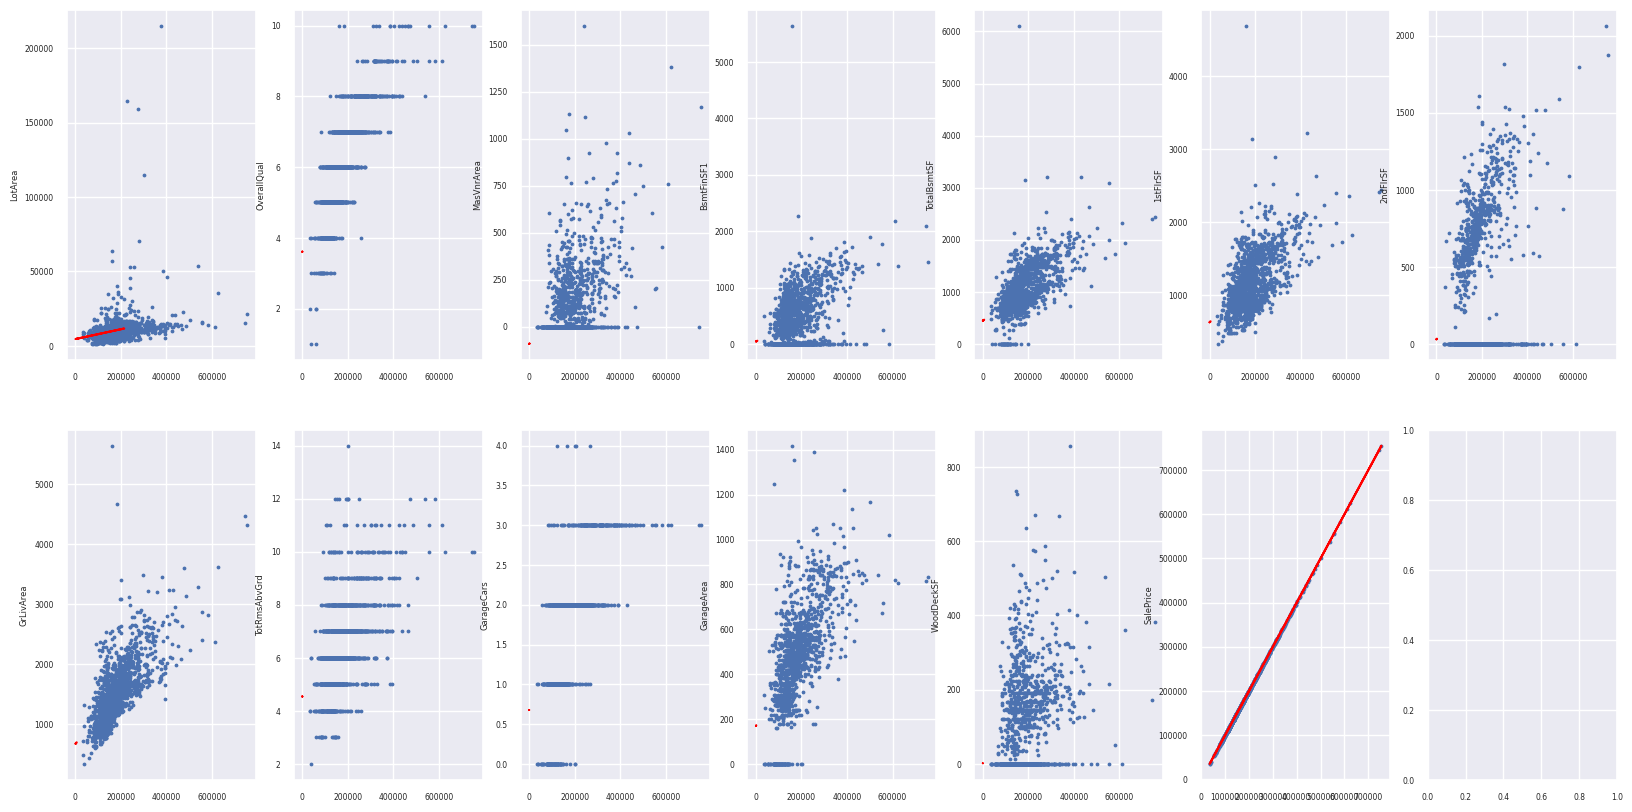

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(HP_train_num1_gdcorrEd.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 10))

for col in HP_train_num1_gdcorrEd.columns:
  z = np.polyfit(HP_train_num1_gdcorrEd['SalePrice'], HP_train_num1_gdcorrEd[col], 1)
  p = np.poly1d(z)
  axs[i][j].scatter(HP_train_num1_gdcorrEd['SalePrice'], HP_train_num1_gdcorrEd[col], s=3)
  axs[i][j].set_ylabel(col)
  axs[i][j].plot(HP_train_num1_gdcorrEd[col], p(HP_train_num1_gdcorrEd[col]), color = 'red', label="col")
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()

## We now have a (final cleaned up) numeric dataset. So we can use this going forward

We now have cleaned up and edited datasets plus the Raw ( less edited) datasets:

Two (2) are categorical and two (2) raw are numeric as follows

**Categorical DataFrames :**

OHE_FinalRaw_DF

OHE_FinalReduced_DF

**Numeric  DataFrames :**

HP_train_num1   (includes SalesPrice)

HP_train_num1_gdcorrEd    (includes SalesPrice)
___________________________________________________________________

Each of the above can be run individually and also -

The following combinations are also reasonable
___________________________________________________________________

OHE_FinalRaw_DF  +  HP_train_num1

OHE_FinalReduced_DF    +   HP_train_num1_gdcorrEd
___________________________________________________________________

So a total of 6 DFs or DF pairs

So lets remove sales price from HP_train_num1 and  HP_train_num1_gdcorrEd

In [ ]:
HP_train_num1_X  = HP_train_num1.copy()
HP_train_num1_X.drop(['SalePrice'], axis=1,inplace=True)

HP_train_num1_gdcorrEd_X  = HP_train_num1_gdcorrEd.copy()
HP_train_num1_gdcorrEd_X.drop(['SalePrice'], axis=1,inplace=True)

HP_train_y  = HP_train_num1_gdcorrEd['SalePrice'].copy()

print(HP_train_num1_X.shape)
print(HP_train_num1_gdcorrEd_X.shape)
print(HP_train_y.shape)

(1460, 41)
(1460, 12)
(1460,)


## And lets lets combine the:  

1.   Raw numerical and catergorical DF

          HP_train_num1_X  + OHE_FinalRaw_DF

2.   Edited numerical and catergorical DF

          HP_train_num1_gdcorrEd_X  + OHE_FinalReduced_DF

In [ ]:
HP_train_RawNumCat_X = pd.concat([HP_train_num1_X, OHE_FinalRaw_DF], axis = 1)

HP_train_ReducedNumCat_X = pd.concat([HP_train_num1_gdcorrEd_X, OHE_FinalReduced_DF], axis = 1)

print(HP_train_RawNumCat_X.shape)
print(HP_train_ReducedNumCat_X.shape)

HP_train_ReducedNumCat_X.head()

(1460, 274)
(1460, 124)


,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,ohe__MSZoning_C (all),ohe__MSZoning_RH,ohe__MSZoning_RL,ohe__MSZoning_FV,ohe__LotShape_Reg,ohe__LotShape_IR3,ohe__LotShape_IR2,ohe__LandContour_Bnk,ohe__LandContour_Lvl,ohe__LandContour_HLS,ohe__LotConfig_FR3,ohe__LotConfig_CulDSac,ohe__Neighborhood_BrDale,ohe__Neighborhood_BrkSide,ohe__Neighborhood_NPkVill,ohe__Neighborhood_Mitchel,ohe__Neighborhood_CollgCr,ohe__Neighborhood_Timber,ohe__Neighborhood_NridgHt,ohe__Condition1_Artery,ohe__Condition1_RRAe,ohe__Condition1_RRNe,ohe__Condition1_RRNn,ohe__Condition2_RRAn,ohe__Condition2_PosA,ohe__BldgType_Twnhs,ohe__BldgType_TwnhsE,ohe__HouseStyle_1.5Unf,ohe__HouseStyle_SFoyer,ohe__HouseStyle_SLvl,ohe__HouseStyle_2.5Fin,ohe__RoofStyle_Mansard,ohe__RoofStyle_Shed,ohe__RoofMatl_Membran,ohe__RoofMatl_WdShngl,ohe__Exterior1st_AsbShng,ohe__Exterior1st_Stucco,ohe__Exterior1st_HdBoard,ohe__Exterior1st_Plywood,ohe__Exterior1st_ImStucc,ohe__Exterior2nd_AsbShng,ohe__Exterior2nd_Brk Cmn,ohe__Exterior2nd_ImStucc,ohe__Exterior2nd_Other,ohe__MasVnrType_None,ohe__MasVnrType_Other,ohe__MasVnrType_Stone,ohe__ExterQual_Fa,ohe__ExterQual_TA,ohe__ExterQual_Gd,ohe__ExterQual_Ex,ohe__ExterCond_Fa,ohe__ExterCond_Ex,ohe__ExterCond_TA,ohe__Foundation_Slab,ohe__Foundation_Stone,ohe__Foundation_Wood,ohe__Foundation_PConc,ohe__BsmtQual_Fa,ohe__BsmtQual_TA,ohe__BsmtQual_Gd,ohe__BsmtQual_Ex,ohe__BsmtCond_Po,ohe__BsmtCond_Fa,ohe__BsmtCond_TA,ohe__BsmtCond_Gd,ohe__BsmtExposure_Other,ohe__BsmtExposure_No,ohe__BsmtExposure_Av,ohe__BsmtExposure_Gd,ohe__BsmtFinType1_Other,ohe__BsmtFinType1_Rec,ohe__BsmtFinType1_Unf,ohe__BsmtFinType1_GLQ,ohe__BsmtFinType2_Other,ohe__BsmtFinType2_LwQ,ohe__BsmtFinType2_GLQ,ohe__Heating_Wall,ohe__Heating_GasA,ohe__HeatingQC_Fa,ohe__HeatingQC_TA,ohe__HeatingQC_Gd,ohe__HeatingQC_Ex,ohe__Electrical_FuseF,ohe__Electrical_Other,ohe__Electrical_SBrkr,ohe__KitchenQual_Fa,ohe__KitchenQual_TA,ohe__KitchenQual_Gd,ohe__KitchenQual_Ex,ohe__Functional_Maj1,ohe__Functional_Typ,ohe__GarageType_CarPort,ohe__GarageType_Detchd,ohe__GarageType_2Types,ohe__GarageType_Attchd,ohe__GarageType_BuiltIn,ohe__GarageFinish_Other,ohe__GarageFinish_Unf,ohe__GarageFinish_RFn,ohe__GarageFinish_Fin,ohe__GarageQual_Other,ohe__GarageQual_Ex,ohe__GarageQual_Gd,ohe__GarageCond_Ex,ohe__GarageCond_TA,ohe__SaleType_ConLw,ohe__SaleType_CWD,ohe__SaleType_Con,ohe__SaleCondition_Alloca,ohe__SaleCondition_Normal,ohe__SaleCondition_Partial
0,8450,7,196.00,706,856,856,854,1710,8,2,548,0,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
1,9600,6,0.00,978,1262,1262,0,1262,6,2,460,298,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
2,11250,7,162.00,486,920,920,866,1786,6,2,608,0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0

## Lets  put the six DFs into a list


## Ideally we should have  just added these within the process but here we are doing it more manually


In [ ]:
HouseDFs = [HP_train_num1_X, OHE_FinalRaw_DF, HP_train_num1_gdcorrEd_X, OHE_FinalReduced_DF,  HP_train_RawNumCat_X,  HP_train_ReducedNumCat_X ]

HouseDFtitles = ['HP_train_num1_X', 'OHE_FinalRaw_DF', 'HP_train_num1_gdcorrEd_X', 'OHE_FinalReduced_DF',  'HP_train_RawNumCat_X',  'HP_train_ReducedNumCat_X' ]
HouseDFtitles[0]

Results = pd.DataFrame()

## So we can now input each of these DFs to a (series of) ML model(s)  and look at the results


#**Apply LogisticRegression to the 6 DFs**


In [ ]:

Results_LR = pd.DataFrame({'REGRESSION TYPE':['logisticRegr RMSE', 'logisticRegr r2']})
count = 0
start_time = datetime.now()
for hdf in HouseDFs:
  x_train, x_test, y_train, y_test = train_test_split(hdf, HP_train_y, test_size=0.25, random_state=0)
  logisticRegr = LogisticRegression(max_iter = 1000)
  logisticRegr.fit(x_train, y_train)
  y_pred = logisticRegr.predict(x_test)

  MSE = mean_squared_error(y_test, y_pred)
  RMSE = math.sqrt(MSE)

  print(HouseDFtitles[count])

  print("RMSE:", RMSE)
  r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
  print("r2_score:", r2)
  print('\n', "----------------------------------------------------------------------------------", '\n')
  pd.options.display.float_format = '{:.2f}'.format
  df2 = pd.DataFrame( {str(HouseDFtitles[count]) : [RMSE, r2]})
  Results_LR = pd.concat([Results_LR, df2], axis = 1)
  count += 1

end_time = datetime.now()
time = (end_time - start_time)
TT = pd.DataFrame( {'Time' : [' ', time]})
Results_LR = pd.concat([Results_LR, TT], axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



HP_train_num1_X
RMSE: 52553.445003119356
r2_score: 0.581657165797028

 ---------------------------------------------------------------------------------- 

OHE_FinalRaw_DF
RMSE: 54668.421860151146
r2_score: 0.547307783011987

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



HP_train_num1_gdcorrEd_X
RMSE: 90769.64480594413
r2_score: -0.2479903456071828

 ---------------------------------------------------------------------------------- 

OHE_FinalReduced_DF
RMSE: 54507.37316142564
r2_score: 0.549971042831225

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



HP_train_RawNumCat_X
RMSE: 50936.0706858614
r2_score: 0.6070106033014646

 ---------------------------------------------------------------------------------- 

HP_train_ReducedNumCat_X
RMSE: 93630.1753774442
r2_score: -0.3278885539122349

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#**Apply RandomForestRegressor to the 6 DFs**

In [ ]:
Results_RF = pd.DataFrame({'REGRESSION TYPE':['RandomForest RMSE', 'RandomForest r2']})
count = 0
start_time = datetime.now()
for hdf in HouseDFs:
  x_train, x_test, y_train, y_test = train_test_split(hdf, HP_train_y, test_size=0.25, random_state=0)
  regr = RandomForestRegressor(max_depth=2, random_state=0)

  regr.fit(x_train, y_train)
  y_pred = regr.predict(x_test)

  MSE = mean_squared_error(y_test, y_pred)
  RMSE = math.sqrt(MSE)
  print(HouseDFtitles[count])
  print("RMSE:", RMSE)
  r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
  print("r2_score:", r2)
  print('\n', "----------------------------------------------------------------------------------", '\n')
  pd.options.display.float_format = '{:.2f}'.format
  df2 = pd.DataFrame( {str(HouseDFtitles[count]) : [RMSE, r2]})
  Results_RF = pd.concat([Results_RF, df2], axis = 1)
  count += 1

end_time = datetime.now()
time = (end_time - start_time)

TT = pd.DataFrame( {'Time' : [' ', time]})
Results_RF = pd.concat([Results_RF, TT], axis = 1)


HP_train_num1_X
RMSE: 44443.688380521286
r2_score: 0.70080788666843

 ---------------------------------------------------------------------------------- 

OHE_FinalRaw_DF
RMSE: 52765.985971535294
r2_score: 0.5782665302347239

 ---------------------------------------------------------------------------------- 

HP_train_num1_gdcorrEd_X
RMSE: 44570.478439160455
r2_score: 0.6990983662689232

 ---------------------------------------------------------------------------------- 

OHE_FinalReduced_DF
RMSE: 50212.04145767154
r2_score: 0.6181034710066879

 ---------------------------------------------------------------------------------- 

HP_train_RawNumCat_X
RMSE: 44655.84747622162
r2_score: 0.6979445853648987

 ---------------------------------------------------------------------------------- 

HP_train_ReducedNumCat_X
RMSE: 44596.47232522401
r2_score: 0.6987472870850996

 ---------------------------------------------------------------------------------- 



#**Apply XGBRegressor to the 6 DFs**

In [ ]:
# evaluate xgboost algorithm for classification
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost
from xgboost import XGBClassifier, XGBRegressor

Results_XGB = pd.DataFrame({'REGRESSION TYPE':['XGB RMSE', 'XGB r2']})
count = 0
start_time = datetime.now()
for hdf in HouseDFs:
  x_train, x_test, y_train, y_test = train_test_split(hdf, HP_train_y, test_size=0.25, random_state=0)
  XGB = XGBRegressor()
  #model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(XGB, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

  XGB.fit(x_train, y_train)
  y_pred = XGB.predict(x_test)

  MSE = mean_squared_error(y_test, y_pred)
  RMSE = math.sqrt(MSE)
  print(HouseDFtitles[count])
  print("RMSE:", RMSE)
  r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
  print("r2_score:", r2)
  print('\n', "----------------------------------------------------------------------------------", '\n')
  pd.options.display.float_format = '{:.2f}'.format
  df2 = pd.DataFrame( {str(HouseDFtitles[count]) : [RMSE, r2]})
  Results_XGB = pd.concat([Results_XGB, df2], axis = 1)

  count += 1
end_time = datetime.now()
time = (end_time - start_time)
TT = pd.DataFrame( {'Time' : [' ', time]})
Results_XGB = pd.concat([Results_XGB, TT], axis = 1)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



HP_train_num1_X
RMSE: 32699.378453428628
r2_score: 0.8380395595670391

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



OHE_FinalRaw_DF
RMSE: 41552.58867703494
r2_score: 0.7384672239422734

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



HP_train_num1_gdcorrEd_X
RMSE: 31079.719748369644
r2_score: 0.8536865867664074

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



OHE_FinalReduced_DF
RMSE: 40393.9064882843
r2_score: 0.7528494022366073

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



HP_train_RawNumCat_X
RMSE: 34413.61556295128
r2_score: 0.8206131683372186

 ---------------------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



HP_train_ReducedNumCat_X
RMSE: 28421.25997579727
r2_score: 0.8776464405517288

 ---------------------------------------------------------------------------------- 



In [ ]:
Results = pd.concat([Results_LR, Results_RF, Results_XGB], axis = 0)
Results

,REGRESSION TYPE,HP_train_num1_X,OHE_FinalRaw_DF,HP_train_num1_gdcorrEd_X,OHE_FinalReduced_DF,HP_train_RawNumCat_X,HP_train_ReducedNumCat_X,Time
0,logisticRegr RMSE,52553.45,54668.42,90769.64,54507.37,50936.07,93630.18,
1,logisticRegr r2,0.58,0.55,-0.25,0.55,0.61,-0.33,0:04:44.027310
0,RandomForest RMSE,44443.69,52765.99,44570.48,50212.04,44655.85,44596.47,
1,RandomForest r2,0.70,0.58,0.70,0.62,0.70,0.70,0:00:01.939437
0,XGB RMSE,32699.38,41552.59,31079.72,40393.91,34413.62,28421.26,
1,XGB r2,0.84,0.74,0.85,0.75,0.82,0.88,0:01:06.171427


In [ ]:
STOPP

NameError: ignored